<h1><center>Analyzing the Adult Census Income Dataset</center></h1>

#### Link: https://www.kaggle.com/datasets/uciml/adult-census-income

###                                                          Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error,roc_curve, r2_score


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load the dataset into a pandas DataFrame

In [2]:
df = pd.read_csv('adult.csv')
print("Dataset imported successfully")
#View summary of dataframe
df.info()

Dataset imported successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Check shape of the dataset

In [3]:
df_shape = df.shape
print(df_shape)

(32561, 15)


### Print column names

In [4]:
df_columns = df.columns
print(df_columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [5]:
# Print first 5 rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In the dataset, the columns "workclass," "occupation," and "native.country" have some values of "?".
This can be handled by filling in the missing values for the '?' fields with the mode of the appropriate columns.

### Handling missing values

In [6]:
df.replace('?', np.nan, inplace=True)

# Fill missing values in 'workclass' column with mode
mode_workclass = df['workclass'].mode()[0]
df['workclass'].fillna(mode_workclass, inplace=True)

# Fill missing values in 'occupation' column with mode
mode_occupation = df['occupation'].mode()[0]
df['occupation'].fillna(mode_occupation, inplace=True)

# Fill missing values in 'native.country' column with mode
mode_native_country = df['native.country'].mode()[0]
df['native.country'].fillna(mode_native_country, inplace=True)

In [7]:
# Check for missing values again
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
# Convert columns with numerical data to numeric data type
numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric)

In [9]:
# Drop unnecessary columns
df.drop(['fnlwgt'], axis=1, inplace=True)

### Calculating correlation matrix

In [10]:
corrmat = df.corr()
print(corrmat)

                     age  education.num  capital.gain  capital.loss  \
age             1.000000       0.036527      0.077674      0.057775   
education.num   0.036527       1.000000      0.122630      0.079923   
capital.gain    0.077674       0.122630      1.000000     -0.031615   
capital.loss    0.057775       0.079923     -0.031615      1.000000   
hours.per.week  0.068756       0.148123      0.078409      0.054256   

                hours.per.week  
age                   0.068756  
education.num         0.148123  
capital.gain          0.078409  
capital.loss          0.054256  
hours.per.week        1.000000  


Text(0.5, 1.0, 'Correlation Heatmap')

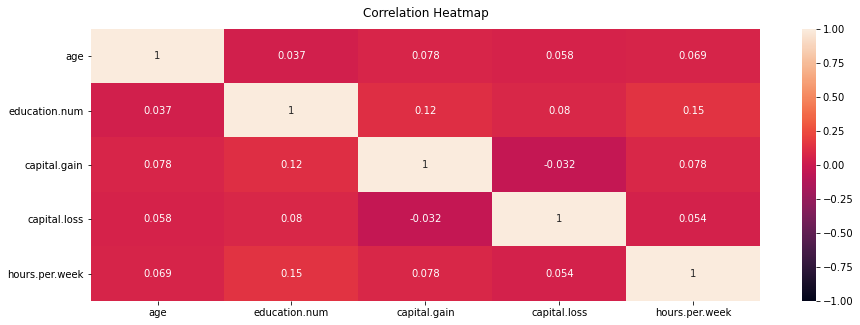

In [11]:
plt.figure(figsize=(15,5))
heatmap = sns.heatmap(corrmat, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


 ### Exploratory Data Analysis (EDA)

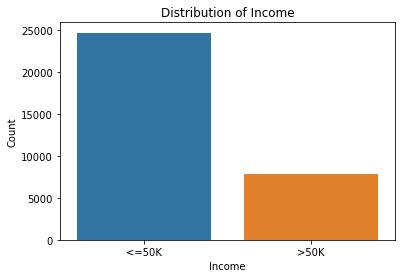

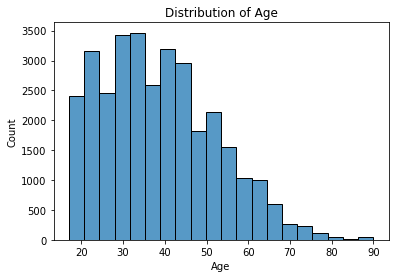

In [12]:
# Visualize the distribution of income
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of age
sns.histplot(df['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



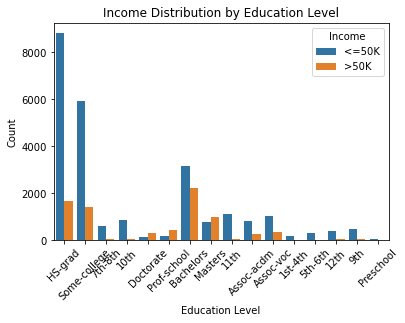

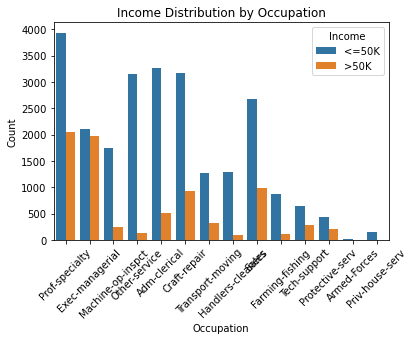

In [13]:
# Visualize the income distribution by education level
sns.countplot(x='education', hue='income', data=df)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

# Visualize the income distribution by occupation
sns.countplot(x='occupation', hue='income', data=df)
plt.title('Income Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()



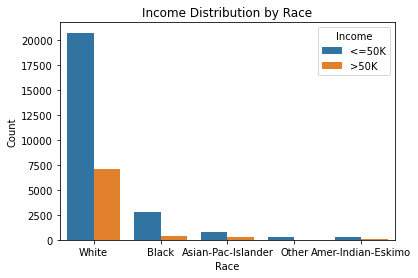

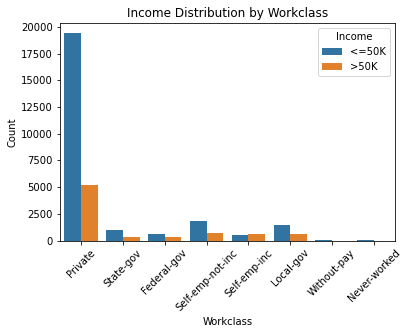

In [14]:

# Visualize the income distribution by race
sns.countplot(x='race', hue='income', data=df)
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right')
plt.show()


# Visualize the income distribution by workclass
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()



### Converting the target variable 'income' to binary 0/1

In [15]:
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df['income'].head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

### Split the dataset into training and testing sets

In [16]:
X = df.drop(['income'], axis=1)

y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Converting categorical variables to numerical variables using LabelEncoder()

In [17]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

### Scale the data using StandardScaler()

In [18]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [19]:
X_train.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


# Model Training

### Logistic Regression

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8215


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7410
           1       0.71      0.44      0.54      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



In [22]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8214760978605794
Precision: 0.7125086385625432
Recall: 0.437049597286986
F1 Score: 0.5417761429322123
ROC AUC Score: 0.6904546232048966


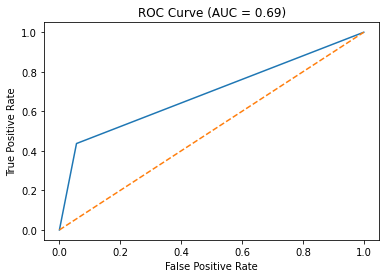

In [23]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()

## Decision Tree Classifier

In [24]:

# initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# fit the model on the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(X_test)

# calculate the accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.8164602313440475


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7410
           1       0.62      0.60      0.61      2359

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.75      9769
weighted avg       0.81      0.82      0.82      9769



In [26]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8164602313440475
Precision: 0.6239054290718039
Recall: 0.6040695209834676
F1 Score: 0.6138272668533277
ROC AUC Score: 0.7440725472663626


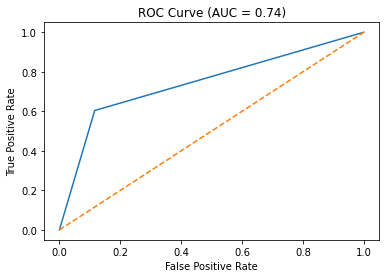

In [27]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()

## k-nearest neighbours

In [28]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print('Knn accuracy:', accuracy)


Knn accuracy: 0.8298699969290613


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7410
           1       0.67      0.59      0.63      2359

    accuracy                           0.83      9769
   macro avg       0.77      0.75      0.76      9769
weighted avg       0.82      0.83      0.83      9769



In [30]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8298699969290613
Precision: 0.6677900818488204
Recall: 0.5879610004239084
F1 Score: 0.6253381424706943
ROC AUC Score: 0.7474217957585129


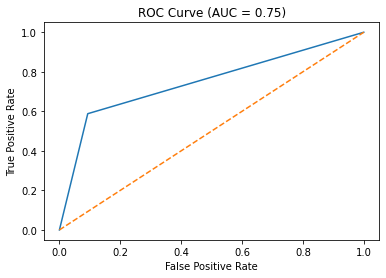

In [31]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()

## Support Vector Machine

In [32]:
from sklearn.svm import SVC
# Create an SVM classifier
svm = SVC()

# Train the model
svm.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = svm.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print('Support Vector Machine accuracy:', accuracy)

Support Vector Machine accuracy: 0.8457365134609479


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7410
           1       0.75      0.54      0.63      2359

    accuracy                           0.85      9769
   macro avg       0.81      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [34]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8457365134609479
Precision: 0.7505882352941177
Recall: 0.5409071640525647
F1 Score: 0.6287262872628727
ROC AUC Score: 0.741843595521559


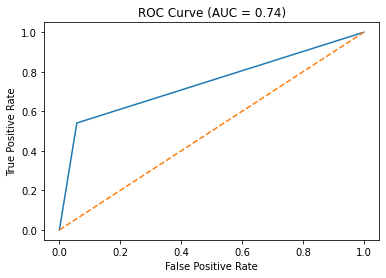

In [35]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()

## Random Forest Classifier

In [36]:

# Create a Random Forest classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print('Random Forest accuracy:', accuracy)


Random Forest accuracy: 0.8479885351622479


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7410
           1       0.72      0.61      0.66      2359

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [38]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8479885351622479
Precision: 0.7169811320754716
Recall: 0.6121237812632472
F1 Score: 0.6604161902584038
ROC AUC Score: 0.7676003521700852


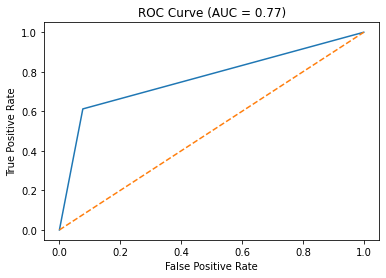

In [39]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()

### Random Forest model performed the best after analyzing the Adult Census Income dataset and training various machine learning models, with an accuracy of 84.78% and an AUC score of 77%